In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data= pd.read_csv(r'marketing.csv')

data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [3]:
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

In [5]:
data=data.drop(['previous','pdays'], axis=1)

In [6]:
data['result']= np.where(data['result']=='no',1,0)

In [7]:
data.corr()['result']

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_64646/1365025257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['result']


ID         -0.002709
age        -0.039048
balance    -0.067328
day         0.046693
campaign    0.116400
result      1.000000
Name: result, dtype: float64

In [8]:
data= data.drop(['ID'], axis=1)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result
0,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,unknown,1
1,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,unknown,1
2,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,unknown,1
3,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,unknown,1
4,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,failure,0
12866,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,failure,0
12867,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,failure,1
12868,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,unknown,1


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables= data[[
    'age',
    'balance',
    'day',
    'campaign',
    
]]

vif=pd.DataFrame()
vif['VIF']= [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']= variables.columns

vif

,VIF,features
0,4.028131,age
1,1.213538,balance
2,3.794649,day
3,1.863598,campaign


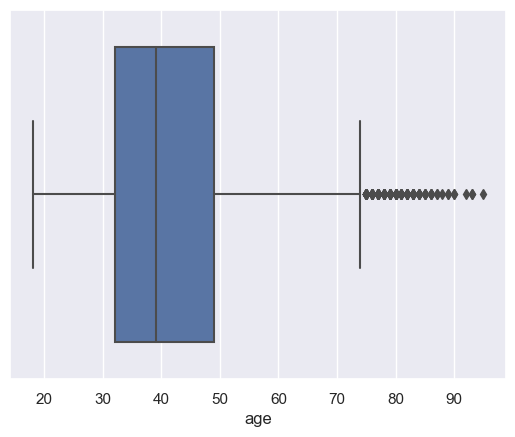

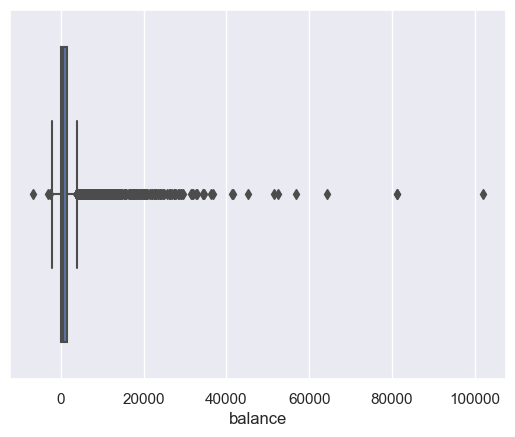

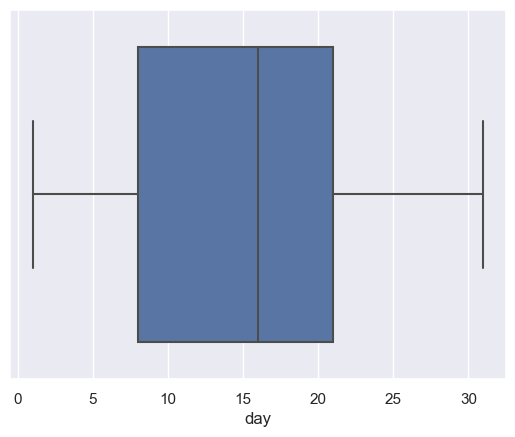

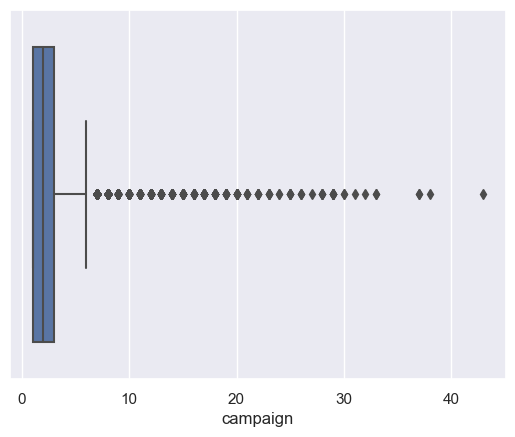

In [10]:
for i in data[['age','balance','day','campaign']]:
    sns.boxplot(data=data, x=data[i])
    plt.show()

In [11]:
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR=q3-q1

Upper=q3+1.5*IQR
Lower=q1-1.5*IQR

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_64646/3877791374.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1= data.quantile(0.25)
/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_64646/3877791374.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3= data.quantile(0.75)


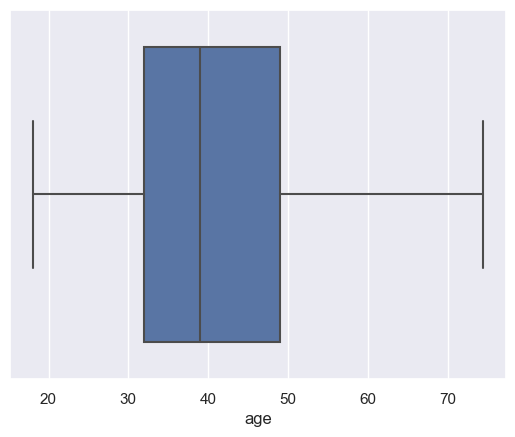

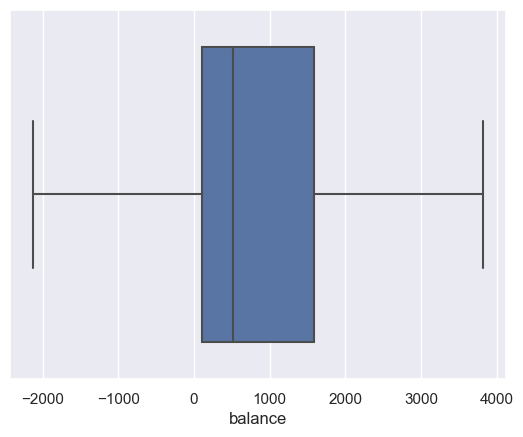

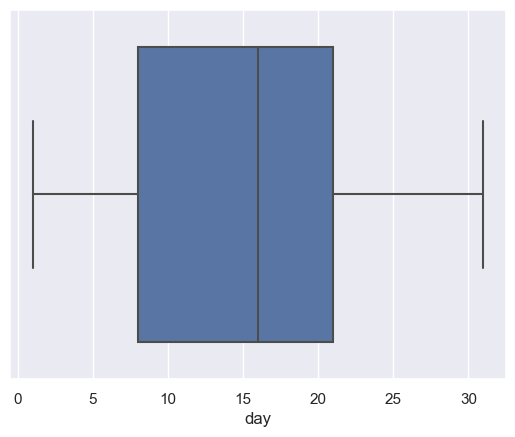

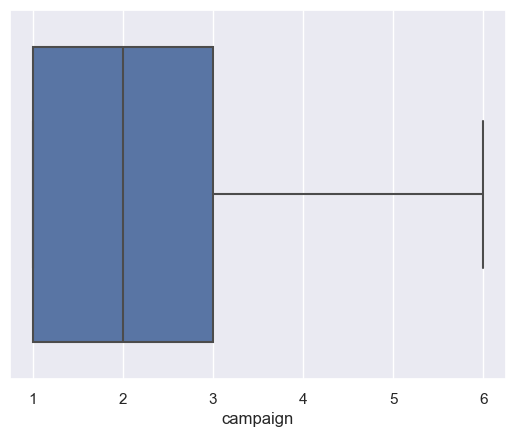

In [12]:
for i in data[['age','balance','day','campaign']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [13]:
data= pd.get_dummies(data, drop_first=True)

data

,age,balance,day,campaign,result,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_other,response_success,response_unknown
0,29.0,3826.375,11.0,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,26.0,512.000,5.0,3.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,30.0,135.000,14.0,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,41.0,30.000,10.0,1.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,27.0,321.000,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47.0,1167.000,30.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12866,31.0,111.000,21.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12867,37.0,1316.000,18.0,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12868,42.0,479.000,28.0,2.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
data.isnull().sum()

age                    0
balance                0
day                    0
campaign               0
result                 0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
response_other         0
response_success       0
response_unknown       0


In [15]:
y=data['result']
x=data.drop(['result'], axis=1)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=20, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    y_predTrain = model.predict(X_train)
    y_probTrain = model.predict_proba(X_train)[:,1]

    roc_probTrain = roc_auc_score(y_train, y_probTrain)
    
    gini_probTrain = roc_probTrain*2-1

    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    
    print('Model Performance for Train')

    print('Gini prob for train is', gini_probTrain*100)

In [19]:
rfc=RandomForestClassifier()

In [20]:
rfc.fit(X_train,y_train)
accuracy= evaluate(rfc, X_test, y_test)

Model Performance
Gini prob is 64.28571428571428
Model Performance for Train
Gini prob for train is 100.0


In [21]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]



max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]



random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [22]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/personal_mac/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [23]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [24]:
optimizedModel= rf_random.best_estimator_
optimizedAccuracy= evaluate(optimizedModel, X_test,y_test)

Model Performance
Gini prob is 76.1904761904762
Model Performance for Train
Gini prob for train is 94.8382714138063


In [25]:
variables= []
test_gini_score= []
train_gini_score= []

for i in X_train.columns:
    X_train_var = X_train[[i]]
    X_test_var = X_test[[i]]
    
    
    optimizedModel.fit(X_train_var,y_train)
    
    y_pred_train= optimizedModel.predict_proba(X_train_var)[:, 1]
    
    train_roc= roc_auc_score(y_train, y_pred_train)
    train_gini = train_roc*2-1
    
    y_pred_test = optimizedModel.predict_proba(X_test_var)[:, 1]
    
    test_roc= roc_auc_score(y_test,y_pred_test)
    test_gini = test_roc*2-1
    
    variables.append(i)
    train_gini_score.append(train_gini)
    test_gini_score.append(test_gini)
    
result_df= pd.DataFrame({
    'variable': variables,
    'train GINI': train_gini_score,
    'test GINI': test_gini_score
})    
    
result_df_sorted = result_df.sort_values( by='test GINI', ascending=False)  
    
pd.options.display.float_format = '{:.4f}'.format
  
result_df_sorted      

,variable,train GINI,test GINI
1,balance,0.5756,0.7381
38,response_unknown,0.2063,0.6667
0,age,0.2096,0.6667
37,response_success,0.1668,0.3333
4,job_blue-collar,0.0972,0.2857
25,month_aug,0.0150,0.2857
15,marital_married,0.0943,0.2857
18,education_tertiary,0.0945,0.2143
22,loan_yes,0.0712,0.2143
29,month_jul,0.0332,0.2143


In [26]:
x= data[['response_unknown','age','balance','response_success',
         'marital_married','job_blue-collar','month_aug','education_tertiary',
         'month_jul','loan_yes','response_other','month_dec','month_sep','month_mar','marital_single','contact_unknown']]
y= data['result']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=20, random_state=42)

In [28]:
rfc=RandomForestClassifier()

In [29]:
rfc.fit(X_train,y_train)
accuracy= evaluate(rfc, X_test, y_test)

Model Performance
Gini prob is 58.33333333333335
Model Performance for Train
Gini prob for train is 99.69989487729232


In [30]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]



max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]



random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [31]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/personal_mac/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
103 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [32]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [33]:
optimizedModel= rf_random.best_estimator_
optimizedAccuracy= evaluate(optimizedModel, X_test,y_test)

Model Performance
Gini prob is 66.6666666666667
Model Performance for Train
Gini prob for train is 59.70030556390324


In [35]:
test_data = pd.read_excel(r'marketing_test.xlsx')
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response
0,812,25,blue-collar,single,secondary,no,764,yes,no,cellular,18,may,1,-1,0,unknown
1,71,40,blue-collar,single,primary,no,118,no,no,unknown,23,feb,1,-1,0,unknown
2,912,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,1,-1,0,unknown
3,43,30,services,single,secondary,no,495,yes,no,cellular,21,nov,1,-1,0,unknown
4,431,36,blue-collar,married,primary,no,1548,yes,yes,cellular,18,may,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,blue-collar,married,secondary,no,413,yes,no,cellular,12,aug,2,182,4,success
853,409,56,management,married,tertiary,no,1282,no,no,cellular,19,aug,4,-1,0,unknown
854,105,54,admin.,married,primary,no,976,yes,no,unknown,3,jun,3,-1,0,unknown
855,810,30,unemployed,single,tertiary,no,1159,no,no,telephone,5,jun,1,-1,0,unknown


In [34]:
x.columns

Index(['response_unknown', 'age', 'balance', 'response_success',
       'marital_married', 'job_blue-collar', 'month_aug', 'education_tertiary',
       'month_jul', 'loan_yes', 'response_other', 'month_dec', 'month_sep',
       'month_mar', 'marital_single', 'contact_unknown'],
      dtype='object')

In [38]:
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'response'],
      dtype='object')

In [39]:
test_data = test_data[['ID','age','balance','response','marital','job','month',
                       'education','loan','contact']]

test_data

,ID,age,balance,response,marital,job,month,education,loan,contact
0,812,25,764,unknown,single,blue-collar,may,secondary,no,cellular
1,71,40,118,unknown,single,blue-collar,feb,primary,no,unknown
2,912,27,451,unknown,divorced,admin.,jul,secondary,no,cellular
3,43,30,495,unknown,single,services,nov,secondary,no,cellular
4,431,36,1548,unknown,married,blue-collar,may,primary,yes,cellular
...,...,...,...,...,...,...,...,...,...,...
852,49,43,413,success,married,blue-collar,aug,secondary,no,cellular
853,409,56,1282,unknown,married,management,aug,tertiary,no,cellular
854,105,54,976,unknown,married,admin.,jun,primary,no,unknown
855,810,30,1159,unknown,single,unemployed,jun,tertiary,no,telephone


In [40]:
test_data = pd.get_dummies(test_data, drop_first=True)
test_data

,ID,age,balance,response_other,response_success,response_unknown,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,education_secondary,education_tertiary,education_unknown,loan_yes,contact_telephone,contact_unknown
0,812,25,764,0,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
1,71,40,118,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,912,27,451,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,43,30,495,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,431,36,1548,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,413,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
853,409,56,1282,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
854,105,54,976,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
855,810,30,1159,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [41]:
test_data=test_data[['ID','response_unknown', 'age', 'balance', 'response_success',
       'marital_married', 'job_blue-collar', 'month_aug', 'education_tertiary',
       'month_jul', 'loan_yes', 'response_other', 'month_dec', 'month_sep',
       'month_mar', 'marital_single', 'contact_unknown']]

test_data

,ID,response_unknown,age,balance,response_success,marital_married,job_blue-collar,month_aug,education_tertiary,month_jul,loan_yes,response_other,month_dec,month_sep,month_mar,marital_single,contact_unknown
0,812,1,25,764,0,0,1,0,0,0,0,0,0,0,0,1,0
1,71,1,40,118,0,0,1,0,0,0,0,0,0,0,0,1,1
2,912,1,27,451,0,0,0,0,0,1,0,0,0,0,0,0,0
3,43,1,30,495,0,0,0,0,0,0,0,0,0,0,0,1,0
4,431,1,36,1548,0,1,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,0,43,413,1,1,1,1,0,0,0,0,0,0,0,0,0
853,409,1,56,1282,0,1,0,1,1,0,0,0,0,0,0,0,0
854,105,1,54,976,0,1,0,0,0,0,0,0,0,0,0,0,1
855,810,1,30,1159,0,0,0,0,1,0,0,0,0,0,0,1,0


In [42]:
test_data['prob_of_interest'] = optimizedModel.predict_proba(test_data.iloc[:,1:])[:,1]

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_64646/3639228086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prob_of_interest'] = optimizedModel.predict_proba(test_data.iloc[:,1:])[:,1]


In [43]:
test_data

,ID,response_unknown,age,balance,response_success,marital_married,job_blue-collar,month_aug,education_tertiary,month_jul,loan_yes,response_other,month_dec,month_sep,month_mar,marital_single,contact_unknown,prob_of_interest
0,812,1,25,764,0,0,1,0,0,0,0,0,0,0,0,1,0,0.5497
1,71,1,40,118,0,0,1,0,0,0,0,0,0,0,0,1,1,0.8555
2,912,1,27,451,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6439
3,43,1,30,495,0,0,0,0,0,0,0,0,0,0,0,1,0,0.6501
4,431,1,36,1548,0,1,1,0,0,0,1,0,0,0,0,0,0,0.7653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,0,43,413,1,1,1,1,0,0,0,0,0,0,0,0,0,0.0956
853,409,1,56,1282,0,1,0,1,1,0,0,0,0,0,0,0,0,0.7244
854,105,1,54,976,0,1,0,0,0,0,0,0,0,0,0,0,1,0.8957
855,810,1,30,1159,0,0,0,0,1,0,0,0,0,0,0,1,0,0.5890
